<a href="https://colab.research.google.com/github/Aishwarya-C-001/PRODIGY_DS_01/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("traffic_dataset.csv")
df.head()

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
0,Afghanistan,AFG,1990,4154,0,12412311.0
1,Afghanistan,AFG,1991,4472,0,13299016.0
2,Afghanistan,AFG,1992,5106,0,14485543.0
3,Afghanistan,AFG,1993,5681,0,15816601.0
4,Afghanistan,AFG,1994,6001,0,17075728.0


In [ ]:
df.shape

(8010, 6)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns=['Code'],inplace=True)
df.isna().sum()

,0
Entity,0
Year,0
Deaths,0
Sidedness,0
Historical_Population,1710


In [ ]:
df[df['Historical_Population'].isna()]['Entity'].unique()

array(['African Region', 'African Union', 'America',
       'Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central sub-Saharan Africa',
       'Commonwealth', 'Commonwealth High Income',
       'Commonwealth Low Income', 'Commonwealth Middle Income',
       'East Asia', 'East Asia & Pacific - World Bank region',
       'Eastern Europe', 'Eastern Mediterranean Region',
       'Eastern sub-Saharan Africa', 'England',
       'Europe & Central Asia - World Bank region', 'European Region',
       'European Union', 'G20', 'High SDI', 'High-income',
       'High-income Asia Pacific', 'High-income North America',
       'High-middle SDI', 'Latin America & Caribbean - World Bank region',
       'Low SDI', 'Low-middle SDI', 'Middle East & North Africa',
       'Middle SDI', 'Nordic Region', 'North Africa and Middle East',
       'Northern Ireland', 'OECD Count

In [ ]:
median_population=df['Historical_Population'].median()
df['Historical_Population'].fillna(median_population,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 8010 non-null   object 
 1   Year                   8010 non-null   int64  
 2   Deaths                 8010 non-null   int64  
 3   Sidedness              8010 non-null   int64  
 4   Historical_Population  8010 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 313.0+ KB


<ipython-input-9-a7f0df202fd2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Historical_Population'].fillna(median_population,inplace=True)


In [ ]:
df.columns.values
df.describe()

,Year,Deaths,Sidedness,Historical_Population
count,8010.000000,8.010000e+03,8010.000000,8.010000e+03
mean,2004.500000,4.451661e+04,0.213483,7.316751e+07
std,8.655982,1.269077e+05,0.409791,4.833010e+08
min,1990.000000,0.000000e+00,0.000000,1.126000e+03
25%,1997.000000,3.322500e+02,0.000000,2.496261e+06
50%,2004.500000,1.969500e+03,0.000000,6.502588e+06
75%,2012.000000,1.323600e+04,0.000000,1.565495e+07
max,2019.000000,1.285039e+06,1.000000,7.713468e+09


In [ ]:
df_new=df.copy()
df_new

,Entity,Year,Deaths,Sidedness,Historical_Population
0,Afghanistan,1990,4154,0,12412311.0
1,Afghanistan,1991,4472,0,13299016.0
2,Afghanistan,1992,5106,0,14485543.0
3,Afghanistan,1993,5681,0,15816601.0
4,Afghanistan,1994,6001,0,17075728.0
...,...,...,...,...,...
8005,Zimbabwe,2015,2373,1,13814642.0
8006,Zimbabwe,2016,2436,1,14030338.0
8007,Zimbabwe,2017,2473,1,14236599.0
8008,Zimbabwe,2018,2509,1,14438812.0


In [ ]:
df_can=df_new.loc['Canada']
df_can
deaths_year_canada=df_can.groupby(['Year'])['Deaths'].sum().reset_index()
deaths_year_canada.columns=['Year','Deaths']
deaths_year_canada.head()

,Year,Deaths
0,1990,4282
1,1991,4139
2,1992,4014
3,1993,3939
4,1994,3801


<ipython-input-18-4bc12f6c3f73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=deaths_year_canada,x='Year',y='Deaths',palette='tab10')


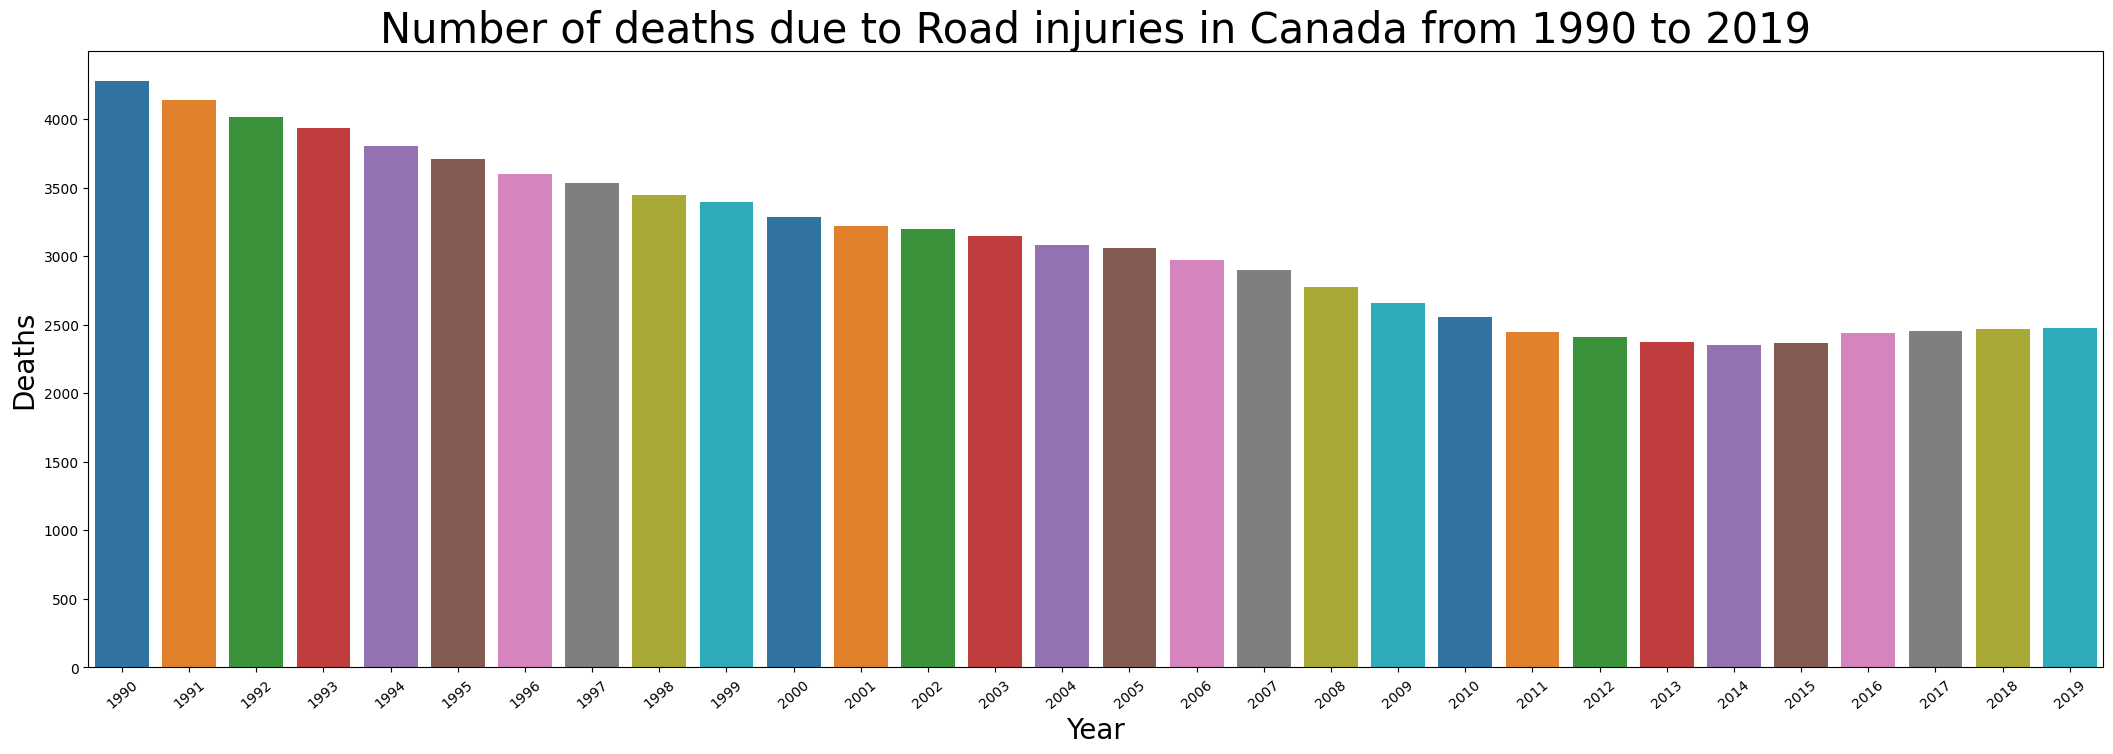

In [ ]:
plt.figure(figsize=(26,8))
sns.barplot(data=deaths_year_canada,x='Year',y='Deaths',palette='tab10')
plt.title('Number of deaths due to Road injuries in Canada from 1990 to 2019',size=30)
plt.ylabel('Deaths',size=20)
plt.xlabel('Year',size=20)
plt.xticks(rotation=40);

<ipython-input-19-67328ac97c7e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=deaths_year_canada,x='Year',y='Deaths',palette='tab10')


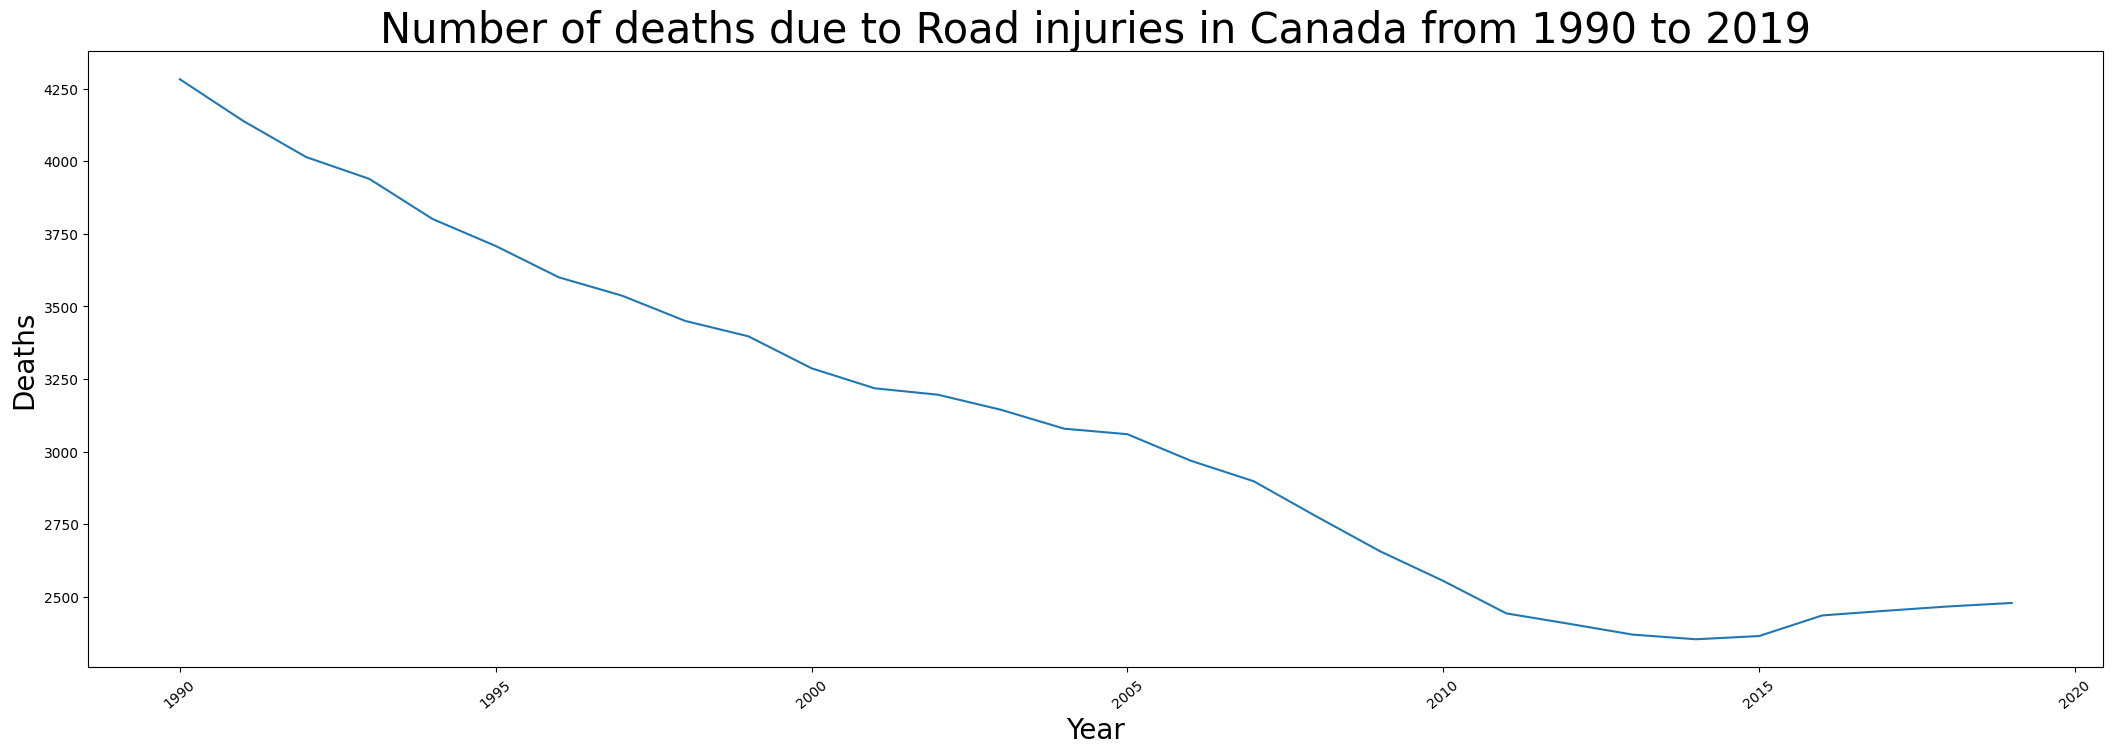

In [ ]:
plt.figure(figsize=(26,8))
sns.lineplot(data=deaths_year_canada,x='Year',y='Deaths',palette='tab10')
plt.title('Number of deaths due to Road injuries in Canada from 1990 to 2019',size=30)
plt.ylabel('Deaths',size=20)
plt.xlabel('Year',size=20)
plt.xticks(rotation=40);